# Final Project: Credit Scoring
### By: <font color='darkred'>Muhammad Fatoni </font>

### <font color = 'darkred'> A. Library Used </font>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import sklearn.model_selection as ms
import sklearn.ensemble as ens
from sklearn.linear_model import LogisticRegression
import sklearn.preprocessing as prep
from sklearn.preprocessing import StandardScaler
import sklearn.metrics as met
import sklearn.feature_selection as fs
import scorecard as sc
import warnings
warnings.filterwarnings('ignore')

### <font color='darkgreen'>1. Credit Scoring</font>

In [2]:
# membaca file application_test
df1 = pd.read_csv('application_test.csv')
df1.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
# membaca file application_train
df2 = pd.read_csv('application_train.csv')
df2.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
df2['TARGET'].value_counts()

0    282686
1     24825
Name: TARGET, dtype: int64

In [5]:
df2['NAME_CONTRACT_TYPE'].value_counts()

Cash loans         278232
Revolving loans     29279
Name: NAME_CONTRACT_TYPE, dtype: int64

In [6]:
# mengisi data NA di df1
df1 = df1.fillna(df1.mean())

In [7]:
# mengisi data NA di df2
df2 = df2.fillna(df2.mean())

In [8]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48744 entries, 0 to 48743
Columns: 121 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(40), object(16)
memory usage: 45.0+ MB


In [9]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [10]:
list(df2.select_dtypes(['object']).columns)

['NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'OCCUPATION_TYPE',
 'WEEKDAY_APPR_PROCESS_START',
 'ORGANIZATION_TYPE',
 'FONDKAPREMONT_MODE',
 'HOUSETYPE_MODE',
 'WALLSMATERIAL_MODE',
 'EMERGENCYSTATE_MODE']

In [11]:
# mengubah record pada data object menjadi nominal di df2
name_contract_type = prep.LabelEncoder()
name_contract_type.fit(df2['NAME_CONTRACT_TYPE'])
df2['NAME_CONTRACT_TYPE_CODE'] = name_contract_type.transform(df2['NAME_CONTRACT_TYPE'])

code_gender = prep.LabelEncoder()
code_gender.fit(df2['CODE_GENDER'])
df2['CODE_GENDER_CODE'] = code_gender.transform(df2['CODE_GENDER'])

flag_own_car = prep.LabelEncoder()
flag_own_car.fit(df2['FLAG_OWN_CAR'])
df2['FLAG_OWN_CAR_CODE'] = flag_own_car.transform(df2['FLAG_OWN_CAR'])

flag_own_realty = prep.LabelEncoder()
flag_own_realty.fit(df2['FLAG_OWN_REALTY'])
df2['FLAG_OWN_REALTY_CODE'] = flag_own_realty.transform(df2['FLAG_OWN_REALTY'])

name_type_suite = prep.LabelEncoder()
name_type_suite.fit(df2['NAME_TYPE_SUITE'])
df2['NAME_TYPE_SUITE_CODE'] = name_type_suite.transform(df2['NAME_TYPE_SUITE'])

name_income_type = prep.LabelEncoder()
name_income_type.fit(df2['NAME_INCOME_TYPE'])
df2['NAME_INCOME_TYPE_CODE'] = name_income_type.transform(df2['NAME_INCOME_TYPE'])

name_education_type = prep.LabelEncoder()
name_education_type.fit(df2['NAME_EDUCATION_TYPE'])
df2['NAME_EDUCATION_TYPE_CODE'] = name_education_type.transform(df2['NAME_EDUCATION_TYPE'])

name_family_status = prep.LabelEncoder()
name_family_status.fit(df2['NAME_FAMILY_STATUS'])
df2['NAME_FAMILY_STATUS_CODE'] = name_family_status.transform(df2['NAME_FAMILY_STATUS'])

name_housing_type = prep.LabelEncoder()
name_housing_type.fit(df2['NAME_HOUSING_TYPE'])
df2['NAME_HOUSING_TYPE_CODE'] = name_housing_type.transform(df2['NAME_HOUSING_TYPE'])

occupation_type = prep.LabelEncoder()
occupation_type.fit(df2['OCCUPATION_TYPE'])
df2['OCCUPATION_TYPE_CODE'] = occupation_type.transform(df2['OCCUPATION_TYPE'])

week_appr_start = prep.LabelEncoder()
week_appr_start.fit(df2['WEEKDAY_APPR_PROCESS_START'])
df2['WEEKDAY_APPR_PROCESS_START_CODE'] = week_appr_start.transform(df2['WEEKDAY_APPR_PROCESS_START'])

organization_type = prep.LabelEncoder()
organization_type.fit(df2['ORGANIZATION_TYPE'])
df2['ORGANIZATION_TYPE_CODE'] = organization_type.transform(df2['ORGANIZATION_TYPE'])

fondkapremont_mode = prep.LabelEncoder()
fondkapremont_mode.fit(df2['FONDKAPREMONT_MODE'])
df2['FONDKAPREMONT_MODE_CODE'] = fondkapremont_mode.transform(df2['FONDKAPREMONT_MODE'])

housetype = prep.LabelEncoder()
housetype.fit(df2['HOUSETYPE_MODE'])
df2['HOUSETYPE_MODE_CODE'] = housetype.transform(df2['HOUSETYPE_MODE'])

wallsmaterial = prep.LabelEncoder()
wallsmaterial.fit(df2['WALLSMATERIAL_MODE'])
df2['WALLSMATERIAL_MODE_CODE'] = wallsmaterial.transform(df2['WALLSMATERIAL_MODE'])

emergencystate = prep.LabelEncoder()
emergencystate.fit(df2['EMERGENCYSTATE_MODE'])
df2['EMERGENCYSTATE_MODE_CODE'] = emergencystate.transform(df2['EMERGENCYSTATE_MODE'])

In [12]:
list(df1.select_dtypes(['object']).columns)

['NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'OCCUPATION_TYPE',
 'WEEKDAY_APPR_PROCESS_START',
 'ORGANIZATION_TYPE',
 'FONDKAPREMONT_MODE',
 'HOUSETYPE_MODE',
 'WALLSMATERIAL_MODE',
 'EMERGENCYSTATE_MODE']

In [13]:
# mengubah record pada data object menjadi nominal di df1
name_contract_type = prep.LabelEncoder()
name_contract_type.fit(df1['NAME_CONTRACT_TYPE'])
df1['NAME_CONTRACT_TYPE_CODE'] = name_contract_type.transform(df1['NAME_CONTRACT_TYPE'])

code_gender = prep.LabelEncoder()
code_gender.fit(df1['CODE_GENDER'])
df1['CODE_GENDER_CODE'] = code_gender.transform(df1['CODE_GENDER'])

flag_own_car = prep.LabelEncoder()
flag_own_car.fit(df1['FLAG_OWN_CAR'])
df1['FLAG_OWN_CAR_CODE'] = flag_own_car.transform(df1['FLAG_OWN_CAR'])

flag_own_realty = prep.LabelEncoder()
flag_own_realty.fit(df1['FLAG_OWN_REALTY'])
df1['FLAG_OWN_REALTY_CODE'] = flag_own_realty.transform(df1['FLAG_OWN_REALTY'])

name_type_suite = prep.LabelEncoder()
name_type_suite.fit(df1['NAME_TYPE_SUITE'])
df1['NAME_TYPE_SUITE_CODE'] = name_type_suite.transform(df1['NAME_TYPE_SUITE'])

name_income_type = prep.LabelEncoder()
name_income_type.fit(df1['NAME_INCOME_TYPE'])
df1['NAME_INCOME_TYPE_CODE'] = name_income_type.transform(df1['NAME_INCOME_TYPE'])

name_education_type = prep.LabelEncoder()
name_education_type.fit(df1['NAME_EDUCATION_TYPE'])
df1['NAME_EDUCATION_TYPE_CODE'] = name_education_type.transform(df1['NAME_EDUCATION_TYPE'])

name_family_status = prep.LabelEncoder()
name_family_status.fit(df1['NAME_FAMILY_STATUS'])
df1['NAME_FAMILY_STATUS_CODE'] = name_family_status.transform(df1['NAME_FAMILY_STATUS'])

name_housing_type = prep.LabelEncoder()
name_housing_type.fit(df1['NAME_HOUSING_TYPE'])
df1['NAME_HOUSING_TYPE_CODE'] = name_housing_type.transform(df1['NAME_HOUSING_TYPE'])

occupation_type = prep.LabelEncoder()
occupation_type.fit(df1['OCCUPATION_TYPE'])
df1['OCCUPATION_TYPE_CODE'] = occupation_type.transform(df1['OCCUPATION_TYPE'])

week_appr_start = prep.LabelEncoder()
week_appr_start.fit(df1['WEEKDAY_APPR_PROCESS_START'])
df1['WEEKDAY_APPR_PROCESS_START_CODE'] = week_appr_start.transform(df1['WEEKDAY_APPR_PROCESS_START'])

organization_type = prep.LabelEncoder()
organization_type.fit(df1['ORGANIZATION_TYPE'])
df1['ORGANIZATION_TYPE_CODE'] = organization_type.transform(df1['ORGANIZATION_TYPE'])

fondkapremont_mode = prep.LabelEncoder()
fondkapremont_mode.fit(df1['FONDKAPREMONT_MODE'])
df1['FONDKAPREMONT_MODE_CODE'] = fondkapremont_mode.transform(df1['FONDKAPREMONT_MODE'])

housetype = prep.LabelEncoder()
housetype.fit(df1['HOUSETYPE_MODE'])
df1['HOUSETYPE_MODE_CODE'] = housetype.transform(df1['HOUSETYPE_MODE'])

wallsmaterial = prep.LabelEncoder()
wallsmaterial.fit(df1['WALLSMATERIAL_MODE'])
df1['WALLSMATERIAL_MODE_CODE'] = wallsmaterial.transform(df1['WALLSMATERIAL_MODE'])

emergencystate = prep.LabelEncoder()
emergencystate.fit(df1['EMERGENCYSTATE_MODE'])
df1['EMERGENCYSTATE_MODE_CODE'] = emergencystate.transform(df1['EMERGENCYSTATE_MODE'])

In [14]:
# prepare data untuk machine learning
feature = df2.drop(['SK_ID_CURR',
 'TARGET',
 'NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'OCCUPATION_TYPE',
 'WEEKDAY_APPR_PROCESS_START',
 'ORGANIZATION_TYPE',
 'FONDKAPREMONT_MODE',
 'HOUSETYPE_MODE',
 'WALLSMATERIAL_MODE',
 'EMERGENCYSTATE_MODE'], axis=1)

label = df2['TARGET']

In [15]:
# split data
x_train, x_test, y_train, y_test = ms.train_test_split(feature, label, test_size=0.2, random_state=0, stratify = label)

In [16]:
# standarisasi data
sc = StandardScaler(with_mean = True, copy = True, with_std = True)
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)


In [17]:
# algoritma logistic regression
classifier = LogisticRegression(solver = 'lbfgs')
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)

In [18]:
# confussion matrix
met.confusion_matrix(y_test, y_pred)

array([[56479,    59],
       [ 4923,    42]], dtype=int64)

In [19]:
# metric
print('Akurasi  :', met.accuracy_score(y_test, y_pred))
print('Presisi  :', met.precision_score(y_test, y_pred))
print('Recall   :', met.recall_score(y_test, y_pred))
print('AUC      :', met.roc_auc_score(y_test, y_pred))

Akurasi  : 0.9189958213420484
Presisi  : 0.4158415841584158
Recall   : 0.008459214501510574
AUC      : 0.5037078342839012


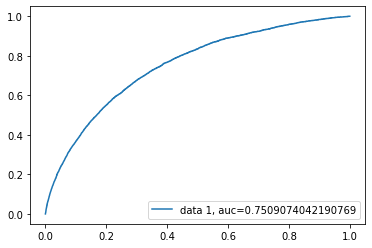

In [20]:
# grafik roc_auc
y_pred_proba = classifier.predict_proba(x_test)[::,1]
fp, tp, _ = met.roc_curve(y_test, y_pred_proba)
auc = met.roc_auc_score(y_test, y_pred_proba)

plt.plot(fp, tp, label = 'data 1, auc='+ str(auc))
plt.legend(loc=4)
plt.show()

In [21]:
# feature importance
rfe = fs.RFE(classifier, step=3)
rfe = rfe.fit(x_train, y_train)
print('Support = ', rfe.support_)
print('Ranking = ', rfe.ranking_)

Support =  [ True False  True  True  True False False  True  True  True  True False
  True  True False  True False  True False  True False False False False
  True False False  True  True  True  True  True False  True False  True
  True  True  True  True  True  True False False False  True False  True
 False False False False  True False False False False False  True  True
 False  True False  True  True False  True  True  True  True False False
 False  True  True  True False  True False  True  True  True  True False
  True False  True False False  True  True False  True False  True False
 False False False False False False  True False False  True  True False
 False  True  True  True False False False False False False False  True]
Ranking =  [ 1 19  1  1  1 10 13  1  1  1  1 21  1  1 16  1  2  1  4  1 13  6 16 15
  1 14 14  1  1  1  1  1 21  1  7  1  1  1  1  1  1  1  9 15 15  1 21  1
  5  9  8  6  1 14  5 17  3  3  1  1  7  1  5  1  1  8  1  1  1  1  4  3
 19  1  1  1  2  1  6  1  1 

In [22]:
feature1 = df2.drop(['SK_ID_CURR',
 'TARGET',
 'NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'OCCUPATION_TYPE',
 'WEEKDAY_APPR_PROCESS_START',
 'ORGANIZATION_TYPE',
 'FONDKAPREMONT_MODE',
 'HOUSETYPE_MODE',
 'WALLSMATERIAL_MODE',
 'EMERGENCYSTATE_MODE'], axis=1)

In [46]:
f = feature1.columns
f1 = pd.DataFrame(f, columns=['Feature'])
f1

,Feature
0,CNT_CHILDREN
1,AMT_INCOME_TOTAL
2,AMT_CREDIT
3,AMT_ANNUITY
4,AMT_GOODS_PRICE
...,...
115,ORGANIZATION_TYPE_CODE
116,FONDKAPREMONT_MODE_CODE
117,HOUSETYPE_MODE_CODE
118,WALLSMATERIAL_MODE_CODE


In [57]:
# data feature importance
feat_rank = pd.DataFrame(rfe.ranking_, columns=['Rank'])
feat_support = pd.DataFrame(rfe.support_, columns=['Support'])
feature_ = pd.DataFrame(f1, columns=['Feature'])

df_feature = pd.concat([feature_, feat_rank, feat_support], axis=1)
df_feature[df_feature['Support'] == False].count()
df_feature

,Feature,Rank,Support
0,CNT_CHILDREN,1,True
1,AMT_INCOME_TOTAL,19,False
2,AMT_CREDIT,1,True
3,AMT_ANNUITY,1,True
4,AMT_GOODS_PRICE,1,True
...,...,...,...
115,ORGANIZATION_TYPE_CODE,20,False
116,FONDKAPREMONT_MODE_CODE,12,False
117,HOUSETYPE_MODE_CODE,18,False
118,WALLSMATERIAL_MODE_CODE,9,False


In [58]:
# predict_proba
predictions = classifier.predict_proba(x_test)
predictions

array([[0.95307154, 0.04692846],
       [0.95287087, 0.04712913],
       [0.80435666, 0.19564334],
       ...,
       [0.94729906, 0.05270094],
       [0.92718936, 0.07281064],
       [0.9090011 , 0.0909989 ]])

In [62]:
y = y_test.reset_index()
y1 = pd.DataFrame(y, columns=['TARGET'])
y1

,TARGET
0,0
1,0
2,0
3,0
4,0
...,...
61498,0
61499,0
61500,1
61501,0


In [65]:
# model output 
df_prediction_prob = pd.DataFrame(predictions, columns = ['Prob_0', 'Prob_1'])
df_prediction_target = pd.DataFrame(classifier.predict(x_test), columns = ['Predicted_TARGET'])
df_test_dataset = pd.DataFrame(y1,columns= ['TARGET'])

dfx=pd.concat([df_test_dataset, df_prediction_prob, df_prediction_target], axis=1)
dfx

,TARGET,Prob_0,Prob_1,Predicted_TARGET
0,0,0.953072,0.046928,0
1,0,0.952871,0.047129,0
2,0,0.804357,0.195643,0
3,0,0.909192,0.090808,0
4,0,0.934667,0.065333,0
...,...,...,...,...
61498,0,0.815180,0.184820,0
61499,0,0.947895,0.052105,0
61500,1,0.947299,0.052701,0
61501,0,0.927189,0.072811,0


In [67]:
dfx.shape

(61503, 4)

In [98]:
dfx['TARGET'].value_counts()

0    56538
1     4965
Name: TARGET, dtype: int64

In [66]:
dfx.describe()

,TARGET,Prob_0,Prob_1,Predicted_TARGET
count,61503.000000,61503.000000,61503.000000,61503.000000
mean,0.080728,0.919725,0.080275,0.001642
std,0.272419,0.073562,0.073562,0.040491
min,0.000000,0.256611,0.000001,0.000000
25%,0.000000,0.898242,0.032031,0.000000
50%,0.000000,0.943577,0.056423,0.000000
75%,0.000000,0.967969,0.101758,0.000000
max,1.000000,0.999999,0.743389,1.000000


### <font color='darkgreen'>2. Implementasi Model</font>

In [83]:
df1_test = df1.drop(['SK_ID_CURR',
 'NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'OCCUPATION_TYPE',
 'WEEKDAY_APPR_PROCESS_START',
 'ORGANIZATION_TYPE',
 'FONDKAPREMONT_MODE',
 'HOUSETYPE_MODE',
 'WALLSMATERIAL_MODE',
 'EMERGENCYSTATE_MODE'], axis=1)
df1_test.shape

(48744, 120)

In [84]:
predict = classifier.predict(df1_test)
print(predict)

[1 1 0 ... 0 0 1]


In [85]:
df1['TARGET'] = predict
df1.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,NAME_FAMILY_STATUS_CODE,NAME_HOUSING_TYPE_CODE,OCCUPATION_TYPE_CODE,WEEKDAY_APPR_PROCESS_START_CODE,ORGANIZATION_TYPE_CODE,FONDKAPREMONT_MODE_CODE,HOUSETYPE_MODE_CODE,WALLSMATERIAL_MODE_CODE,EMERGENCYSTATE_MODE_CODE,TARGET
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,1,1,18,5,28,4,0,5,0,1
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,1,1,9,0,42,4,3,7,2,1
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,...,1,1,4,1,54,4,3,7,2,0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,...,1,1,14,6,5,2,0,4,0,0
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,...,1,1,18,0,5,4,3,7,2,0


In [89]:
feature2 = df1.drop(['SK_ID_CURR',
 'NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'OCCUPATION_TYPE',
 'WEEKDAY_APPR_PROCESS_START',
 'ORGANIZATION_TYPE',
 'FONDKAPREMONT_MODE',
 'HOUSETYPE_MODE',
 'WALLSMATERIAL_MODE',
 'EMERGENCYSTATE_MODE'], axis=1)

label2 = df1['TARGET']

In [90]:
X_train, X_test, Y_train, Y_test = ms.train_test_split(feature2, label2, test_size=0.2, stratify=label2)

In [91]:
sc = StandardScaler(with_mean = True, copy = True, with_std = True)
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [93]:
model2 = LogisticRegression(solver='lbfgs')
model2.fit(X_train, Y_train)

LogisticRegression()

In [96]:
y_prediksi2 = model2.predict(X_test)
score = met.accuracy_score(Y_test, y_prediksi2)
precision = met.precision_score(Y_test, y_prediksi2)
recall = met.recall_score(Y_test, y_prediksi2)
auc = met.roc_auc_score(Y_test, y_prediksi2)

print('Prediksi = ', y_prediksi2, '\nAkurasi  = ', score, '\nPresisi  = ', 
      precision, '\nRecall   = ', recall, '\nAUC      = ', auc)

Prediksi =  [0 0 1 ... 1 1 1] 
Akurasi  =  1.0 
Presisi  =  1.0 
Recall   =  1.0 
AUC      =  1.0


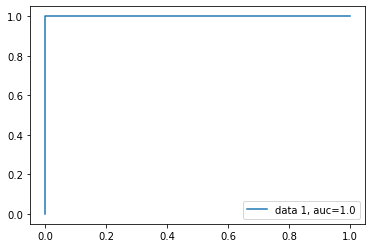

In [97]:
y_pred_proba2 = model2.predict_proba(X_test)[::,1]
fp, tp, _ = met.roc_curve(Y_test, y_pred_proba2)
auc = met.roc_auc_score(Y_test, y_pred_proba2)

plt.plot(fp, tp, label = 'data 1, auc='+ str(auc))
plt.legend(loc=4)
plt.show()

### <font color='darkgreen'>3. </font>

In [100]:
df3 = pd.read_csv('bureau.csv')
df3.head()

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
0,215354,5714462,Closed,currency 1,-497,0,-153.0,-153.0,NaN,0,91323.0,0.0,NaN,0.0,Consumer credit,-131,NaN
1,215354,5714463,Active,currency 1,-208,0,1075.0,NaN,NaN,0,225000.0,171342.0,NaN,0.0,Credit card,-20,NaN
2,215354,5714464,Active,currency 1,-203,0,528.0,NaN,NaN,0,464323.5,NaN,NaN,0.0,Consumer credit,-16,NaN
3,215354,5714465,Active,currency 1,-203,0,NaN,NaN,NaN,0,90000.0,NaN,NaN,0.0,Credit card,-16,NaN
4,215354,5714466,Active,currency 1,-629,0,1197.0,NaN,77674.5,0,2700000.0,NaN,NaN,0.0,Consumer credit,-21,NaN


In [101]:
df3.duplicated().sum()

0

In [103]:
df3.shape

(1716428, 17)

In [102]:
df3.isna().sum()

SK_ID_CURR                      0
SK_ID_BUREAU                    0
CREDIT_ACTIVE                   0
CREDIT_CURRENCY                 0
DAYS_CREDIT                     0
CREDIT_DAY_OVERDUE              0
DAYS_CREDIT_ENDDATE        105553
DAYS_ENDDATE_FACT          633653
AMT_CREDIT_MAX_OVERDUE    1124488
CNT_CREDIT_PROLONG              0
AMT_CREDIT_SUM                 13
AMT_CREDIT_SUM_DEBT        257669
AMT_CREDIT_SUM_LIMIT       591780
AMT_CREDIT_SUM_OVERDUE          0
CREDIT_TYPE                     0
DAYS_CREDIT_UPDATE              0
AMT_ANNUITY               1226791
dtype: int64

In [114]:
df3.columns

Index(['SK_ID_CURR', 'SK_ID_BUREAU', 'CREDIT_ACTIVE', 'CREDIT_CURRENCY',
       'DAYS_CREDIT', 'CREDIT_DAY_OVERDUE', 'DAYS_CREDIT_ENDDATE',
       'DAYS_ENDDATE_FACT', 'AMT_CREDIT_MAX_OVERDUE', 'CNT_CREDIT_PROLONG',
       'AMT_CREDIT_SUM', 'AMT_CREDIT_SUM_DEBT', 'AMT_CREDIT_SUM_LIMIT',
       'AMT_CREDIT_SUM_OVERDUE', 'CREDIT_TYPE', 'DAYS_CREDIT_UPDATE',
       'AMT_ANNUITY'],
      dtype='object')

In [118]:
df3_1 = df3.drop(['AMT_CREDIT_MAX_OVERDUE', 'AMT_ANNUITY'], axis=1)
df3_1.shape

(1716428, 15)

In [119]:
df3_1.isna().sum()

SK_ID_CURR                     0
SK_ID_BUREAU                   0
CREDIT_ACTIVE                  0
CREDIT_CURRENCY                0
DAYS_CREDIT                    0
CREDIT_DAY_OVERDUE             0
DAYS_CREDIT_ENDDATE       105553
DAYS_ENDDATE_FACT         633653
CNT_CREDIT_PROLONG             0
AMT_CREDIT_SUM                13
AMT_CREDIT_SUM_DEBT       257669
AMT_CREDIT_SUM_LIMIT      591780
AMT_CREDIT_SUM_OVERDUE         0
CREDIT_TYPE                    0
DAYS_CREDIT_UPDATE             0
dtype: int64

In [ ]:
df3_2 = df3_1.dropna()
df3_2.shape

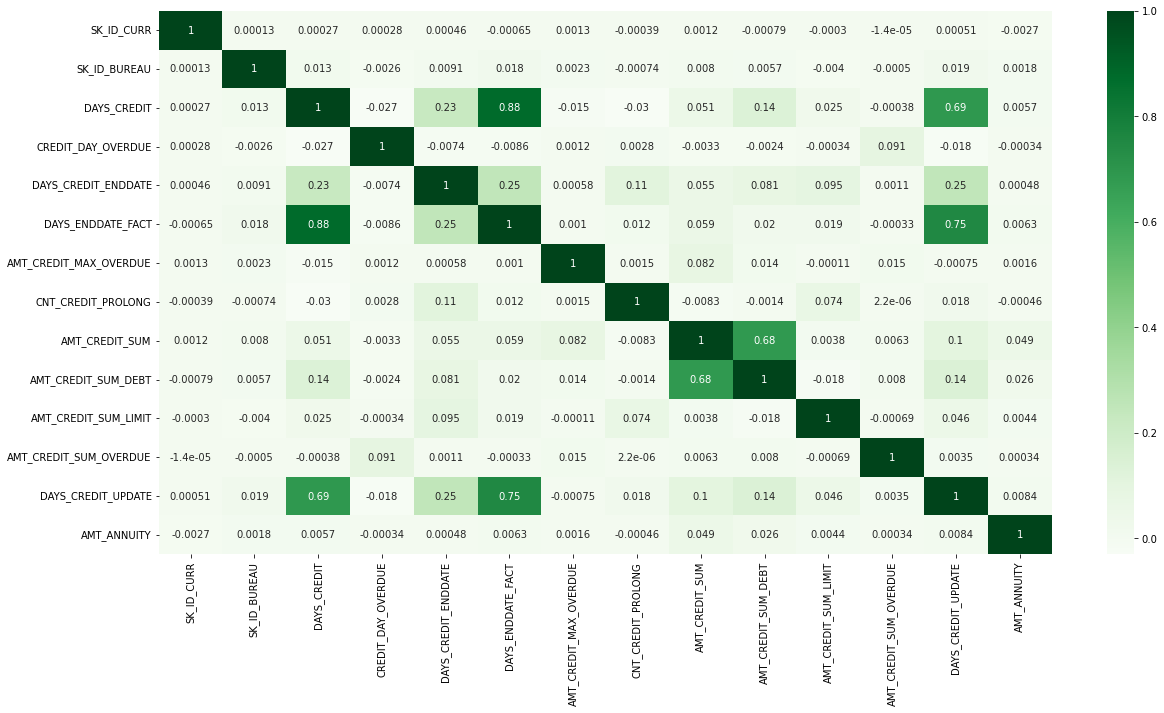

In [111]:
plt.figure(figsize=(20, 10))
sns.heatmap(df3.corr(), annot=True, cmap = 'Greens')

plt.show()